# Task_#3_Vysotskiy_Roman_Group_j4132c

# Import libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Task 3
## 1. Develop yourself using numpy library:
### a) python function for implementation of gradient descent (GD) with momentum algorithm for the function of two variables f(x,y).
### b) python function for implementation of ADAM optimization algorithm for the function of two variables f(x,y).
## 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
## 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N or in the form of 2D-plane graph.
## 4. Write a conclusions about the accuracy of the implemented algorithms.

# Part 1

In [116]:
#set python function

def Matyas(x, y):
    return 0.26 * (x**2 + y**2) - 0.48*x*y  #global min f(0, 0) = 0

def dfdx_matyas(x, y):
    return 0.52*x - 0.48*y

def dfdy_matyas(x, y):
    return 0.52*y - 0.48*x

def gradient_matyas(x, y):
    return np.array([dfdx_matyas(x, y), dfdy_matyas(x, y)]) #

############
def HimmelBlau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2  #several local mins f(3.0, 2.0) = 0 e.t.c

def dfdx_him(x, y):
    return 4*x * (x**2 + y - 11) + 2*x + 2*y**2 - 14

def dfdy_him(x, y):
    return 2*x**2 + 4*y*(x + y**2 + 7) + 2*y - 22

def gradient_him(x, y):
    return np.array([dfdx_him(x, y), dfdy_him(x, y)])

#############
def Paraboloid(x, y):
    return x**2 + y**2 # global min f(0, 0) = 0

def dfdx_par(x, y):
    return 2*x

def dfdy_par(x, y):
    return 2*y

def gradient_par(x, y):
    return np.array([dfdx_par(x, y), dfdy_par(x, y)])

# Defining function

In [169]:
# Gradient descent momentum

def grad_descent_mult_momentum(x_prev, learn_rate, gradient, beta = 0.9, velocity = 0, max_itter = 1000):

    epsilon = 0.0001
    grad_iter = 1

    seq_x = []
    seq_y = []

    velocity = velocity*beta + (1 - beta)*gradient(x_prev[0],x_prev[1])
    x_next = x_prev - learn_rate*velocity

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    while np.linalg.norm(np.subtract(x_next, x_prev)) > epsilon:

        x_prev = x_next
        velocity = velocity*beta + (1 - beta)*gradient(x_prev[0],x_prev[1])
        x_next = x_prev - learn_rate*velocity
        grad_iter += 1

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

        if grad_iter == max_itter:
            break

    return x_next, grad_iter, seq_x, seq_y

Minimum (x,y) from GD momentum: [0.00321194 0.00321194]
Number of GD momentum iterations: 143


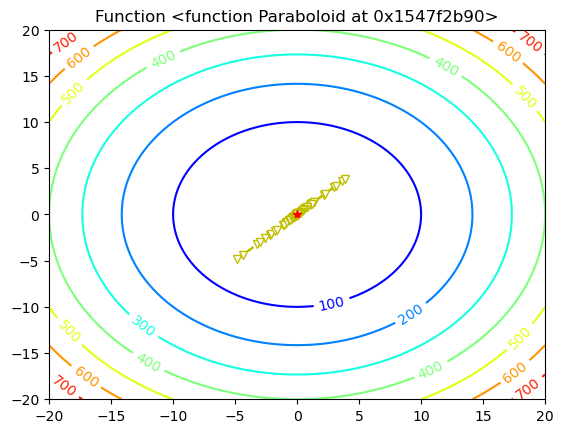

Minimum (x,y) from GD momentum: [-0.00071838 -0.00144593]
Number of GD momentum iterations: 158


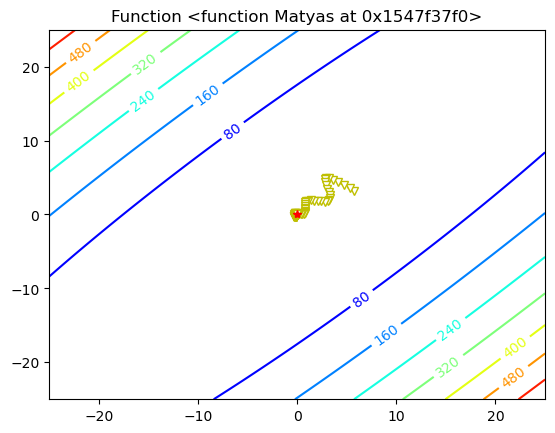

Minimum (x,y) from GD momentum: [ 3.39941196 -0.02519581]
Number of GD momentum iterations: 171


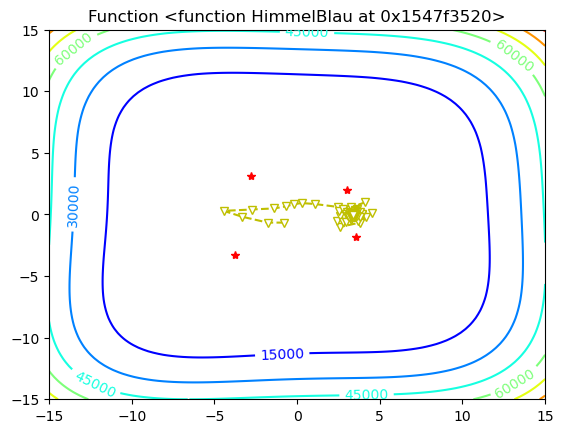

In [242]:
def contour_plot(func, x_seq, y_seq, bounds, optimum):
    plt.figure(1)
    x = np.linspace(*bounds, 101)
    y = np.linspace(*bounds, 101)
    xx, yy = np.meshgrid(x, y)
    z = plt.contour(xx, yy, func(xx, yy), cmap='jet')
    plt.clabel(z, inline=1, fontsize=10)

    plt.plot(x_seq, y_seq, '--v', color='y', markerfacecolor='w')
    for opt in optimum:
        plt.plot(opt[0], opt[1], '*', color = 'r')

    plt.title(f'Function {func}')
    plt.show()

grad_output_paraboloid = grad_descent_mult_momentum(np.array([6,6]), 0.2, gradient_par)

print('Minimum (x,y) from GD momentum: %s' %grad_output_paraboloid[0])
print('Number of GD momentum iterations: %s' %grad_output_paraboloid[1])

contour_plot(Paraboloid, grad_output_paraboloid[2], grad_output_paraboloid[3], [-20, 20], [[0, 0]])

grad_output_matyas = grad_descent_mult_momentum([6, 3], 0.15, gradient_matyas)
print('Minimum (x,y) from GD momentum: %s' %grad_output_matyas[0])
print('Number of GD momentum iterations: %s' %grad_output_matyas[1])
contour_plot(Matyas, grad_output_matyas[2], grad_output_matyas[3], [-25, 25], [[0, 0]])

grad_output_him = grad_descent_mult_momentum([0, 0], 0.015, gradient_him, velocity=1.1)
print('Minimum (x,y) from GD momentum: %s' %grad_output_him[0])
print('Number of GD momentum iterations: %s' %grad_output_him[1])
contour_plot(HimmelBlau, grad_output_him[2], grad_output_him[3], [-15, 15], [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]])

### Gradient Descent Momentum method speeds up the movement of the gradient descent towards the extremum and reduces oscillations in the wrong directions. Usually β is set to 0.9, which makes it possible to take into account the inertia of motion accumulated over the previous iterations to a greater extent, and to pay less attention to new changes.

In [153]:
# Adam

def adam(x_prev, learn_rate, gradient, beta1 = 0.9, beta2 = 0.999, velocity = 0, s = 0, eps = 1e-8, gamma = 0.1):

    epsilon = 0.0001
    grad_iter = 1
    t = 1

    seq_x = []
    seq_y = []


    velocity = beta1*velocity + (1 - beta1)*gradient(x_prev[0], x_prev[1])
    s = beta2*s + (1 - beta2)*(gradient(x_prev[0], x_prev[1])**2)

    v_corr = velocity / (1 - gamma**t)
    s_corr = s / (1 - gamma**t)

    x_next = x_prev - learn_rate*v_corr / (np.sqrt(s_corr) + eps)

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    while np.linalg.norm(np.subtract(x_next, x_prev)) > epsilon:

        t += 1
        x_prev = x_next

        velocity = beta1*velocity + (1 - beta1)*gradient(x_prev[0], x_prev[1])
        s = beta2*s + (1 - beta2)*(gradient(x_prev[0], x_prev[1])**2)

        v_corr = velocity / (1 - gamma**t)
        s_corr = s / (1 - gamma**t)

        x_next = x_prev - learn_rate*v_corr / (np.sqrt(s_corr) + eps)

        grad_iter += 1

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

        if grad_iter == 1000:
            break

    return x_next, grad_iter, seq_x, seq_y

Minimum (x,y) from Adam: [-0.01903424 -0.01903424]
Number of Adam: 107


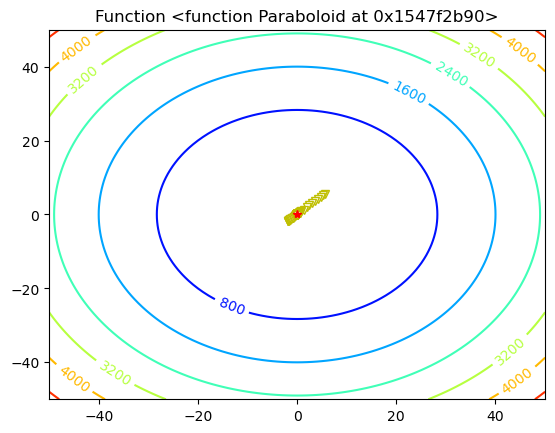

Minimum (x,y) from Adam: [0.00232148 0.00231531]
Number of Adam: 295


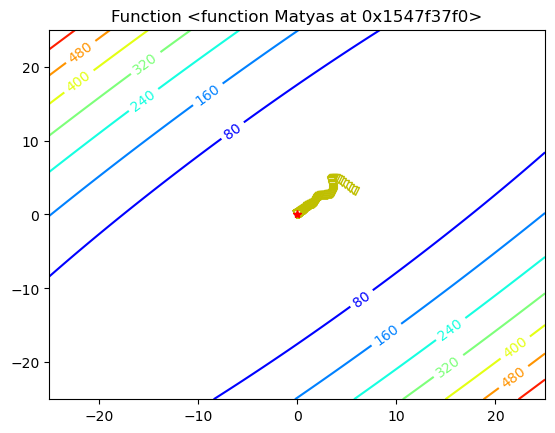

Minimum (x,y) from Adam: [ 3.39845463 -0.0252526 ]
Number of Adam: 140


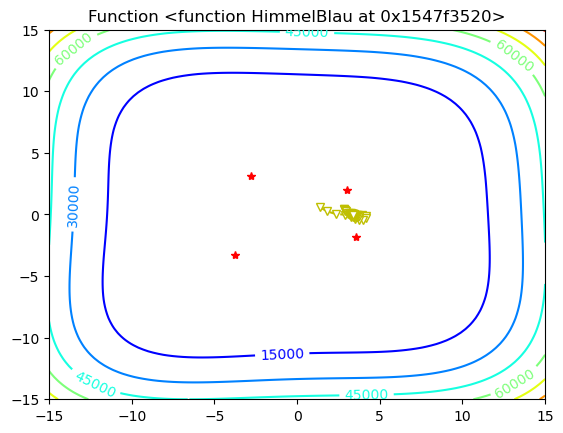

In [262]:
adam_paraboloid = adam(np.array([6,6]), 0.1, gradient_par)

print('Minimum (x,y) from Adam: %s' %adam_paraboloid[0])
print('Number of Adam: %s' %adam_paraboloid[1])

contour_plot(Paraboloid, adam_paraboloid[2], adam_paraboloid[3], [-50, 50], [[0, 0]])


adam_matyas = adam([6, 3], 0.05, gradient_matyas)
print('Minimum (x,y) from Adam: %s' %adam_matyas[0])
print('Number of Adam: %s' %adam_matyas[1])
contour_plot(Matyas, adam_matyas[2], adam_matyas[3], [-25, 25], [[0, 0]])

adam_him = adam([1, 1], 0.1, gradient_him, velocity=0.6, s=0.35, gamma=0.5)
print('Minimum (x,y) from Adam: %s' %adam_him[0])
print('Number of Adam: %s' %adam_him[1])
contour_plot(HimmelBlau, adam_him[2], adam_him[3], [-15, 15], [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126]])

### Adam (Adaptive momentum algorithm) is one of the most popular optimization algorithms in deep learning. It uses an adaptive learning rate which calculated and exponential moving averages of gradients and gradient squares are stored.
### As a Gradient Descent with inertia Adam algorithm find optimum point but faster than first one.

## Visualize optimization

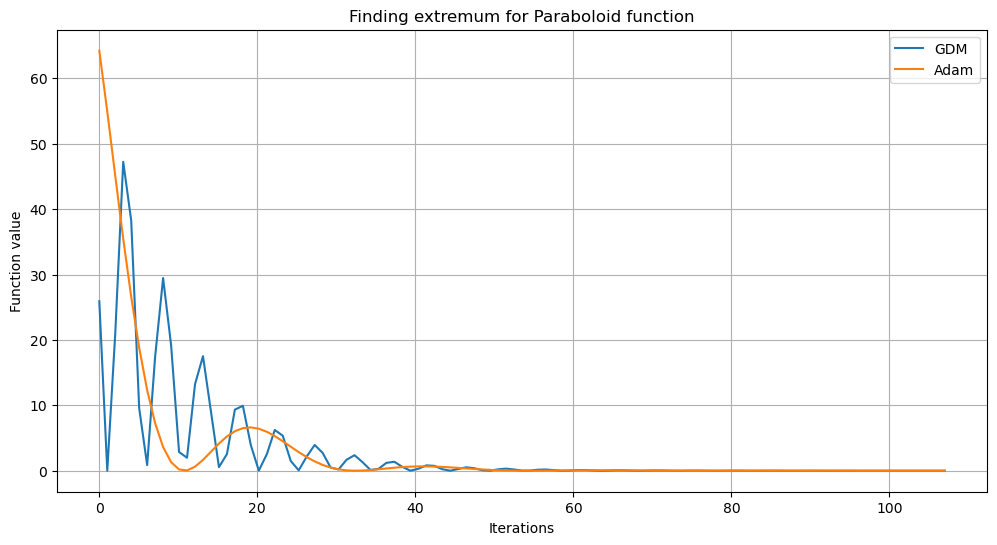

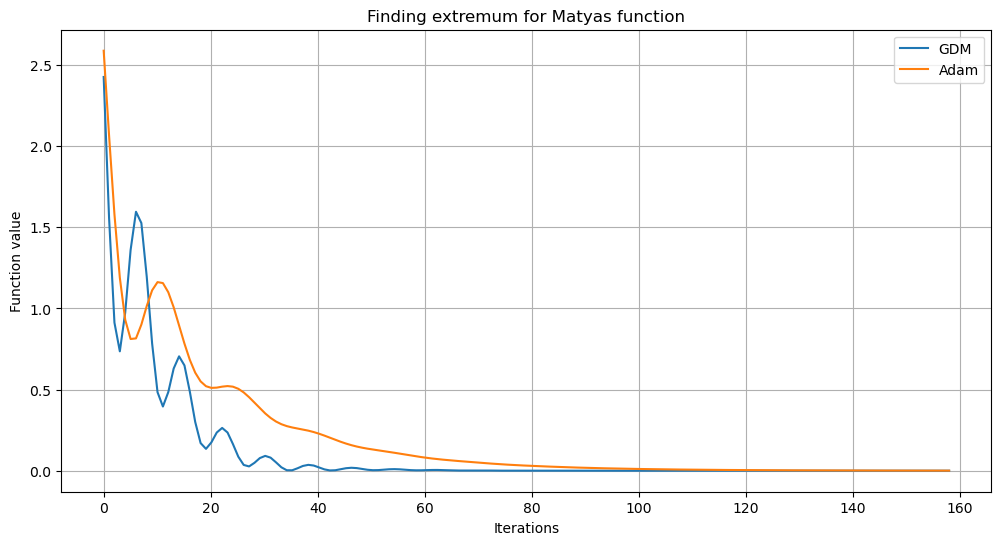

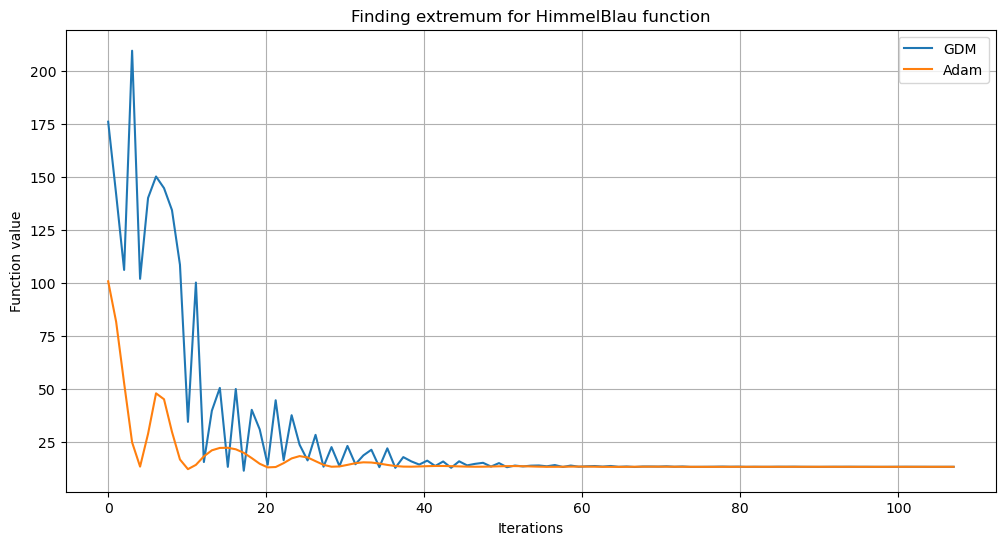

In [263]:
functions = ['Paraboloid', 'Matyas', 'HimmelBlau']

iterations = [np.minimum(grad_output_paraboloid[1], adam_paraboloid[1]), np.minimum(grad_output_matyas[1], adam_matyas[1]),
              np.minimum(grad_output_him[1], adam_paraboloid[1])]

function_values = [[Paraboloid(grad_output_paraboloid[2], grad_output_paraboloid[3]), Paraboloid(adam_paraboloid[2], adam_paraboloid[3])], [Matyas(grad_output_matyas[2], grad_output_matyas[3]), Matyas(adam_matyas[2], adam_matyas[3])],
    [HimmelBlau(grad_output_him[2], grad_output_him[3]), HimmelBlau(adam_him[2], adam_him[3])]]


for i in range(len(functions)):
    plt.figure(figsize=(12, 6))
    plt.title(f'Finding extremum for {functions[i]} function')
    plt.plot(np.linspace(0, iterations[i], iterations[i]), function_values[i][0][:iterations[i]], label='GDM')
    plt.plot(np.linspace(0, iterations[i], iterations[i]), function_values[i][1][:iterations[i]], label='Adam')

    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    plt.grid()
    plt.legend()

## Compare changes of loss value we can see that Adam algorithm has slight curve than GDM. In addition he finds minimal value with less iterations. Anyway both algorithms find minimals.

In [197]:
# make a table for convenient look

data = pd.DataFrame({
        'Function': ['Paraboloid', 'Matyas', 'HimmelBlau'],
        'Global_min_param': [[0, 0], [0, 0], [3.0, 2.0]],
        'Global_min':[0, 0, 0],
        'GDM_min': [round(Paraboloid(*grad_output_paraboloid[0]), 2), round(Matyas(*grad_output_matyas[0]), 2), round(HimmelBlau(*grad_output_him[0]), 2)],
        'Adam_min': [round(Paraboloid(*adam_paraboloid[0]), 2), round(Matyas(*adam_matyas[0]), 2), round(HimmelBlau(*adam_him[0]), 2)],
        'GDM_param':[grad_output_paraboloid[0].round(2), grad_output_matyas[0].round(2), grad_output_him[0].round(2)],'Adam_param':[adam_paraboloid[0].round(2), adam_matyas[0].round(2), adam_him[0].round(2)],
        'GDM_iter': [grad_output_paraboloid[1], grad_output_matyas[1], grad_output_him[1]],
        'Adam_iter': [adam_paraboloid[1], adam_matyas[1], adam_him[1]],
        }, index=[0, 1, 2])

print('Global min for HimmelBlau function:', [3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126], '\n')
data

Global min for HimmelBlau function: [3.0, 2.0] [-2.805118, 3.131312] [-3.77931, -3.283186] [3.584428, -1.848126] 



,Function,Global_min_param,Global_min,GDM_min,Adam_min,GDM_param,Adam_param,GDM_iter,Adam_iter
0,Paraboloid,"[0, 0]",0,0.00,0.00,"[0.0, 0.0]","[-0.02, -0.02]",143,107
1,Matyas,"[0, 0]",0,0.00,0.00,"[-0.0, -0.0]","[-0.0, -0.0]",170,165
2,HimmelBlau,"[3.0, 2.0]",0,13.24,13.24,"[3.4, -0.02]","[3.4, -0.03]",154,137


### Both algorithms didn't find correct minimum of HimmelBlau Function since there are many local minimals where the optimization method can be stuck. However, in each optimization task Adam make it faster than GDM.

# Conclusion

## During this work we made two algorithms - Gradient Descent with inertia (Momentum) and Adaptive Momentum algorithm (Adam). Adam optimizer gives much higher performance results than the other one optimizer and outperform by a big margin for a better-optimized gradient. The plots above is one example of a performance comparison of two optimizers.